In [34]:
import numpy as np
import pandas as pd

df = pd.read_csv("D:\Excelr_assignments\PCA\PCA\wine.csv")
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\E'
<>:4: SyntaxWarning: invalid escape sequence '\E'
C:\Users\dell\AppData\Local\Temp\ipykernel_14288\944137622.py:4: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("D:\Excelr_assignments\PCA\PCA\wine.csv")


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
original_df = df.copy()
original_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [38]:
df.shape

(178, 14)

In [10]:
# converting the values into the int datatype :

df.drop(columns = ['Type','Magnesium','Proline']).astype(int)

,Alcohol,Malic,Ash,Alcalinity,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,14,1,2,15,2,3,0,2,5,1,3
1,13,1,2,11,2,2,0,1,4,1,3
2,13,2,2,18,2,3,0,2,5,1,3
3,14,1,2,16,3,3,0,2,7,0,3
4,13,2,2,21,2,2,0,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...
173,13,5,2,20,1,0,0,1,7,0,1
174,13,3,2,23,1,0,0,1,7,0,1
175,13,4,2,20,1,0,0,1,10,0,1
176,13,2,2,20,1,0,0,1,9,0,1


In [65]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
# checking whether their are null values in the data set or not :

df.isnull().sum()

# and there are no null values in the data set :


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

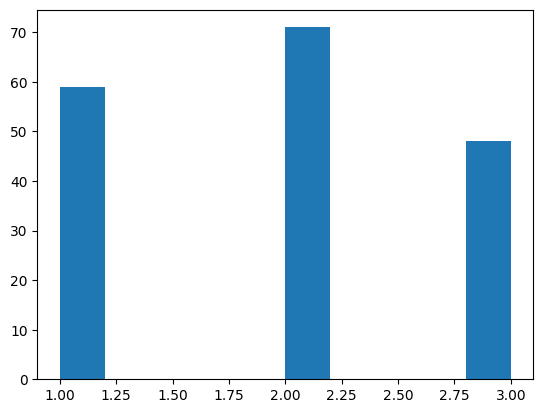

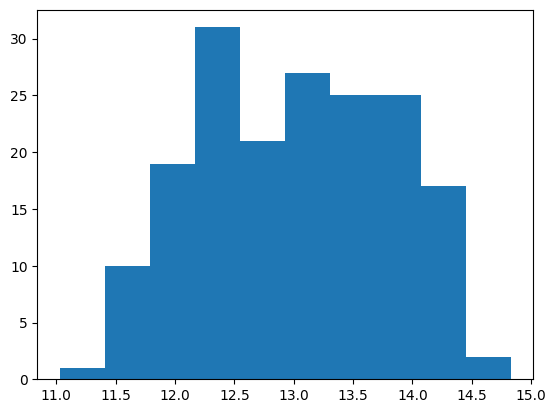

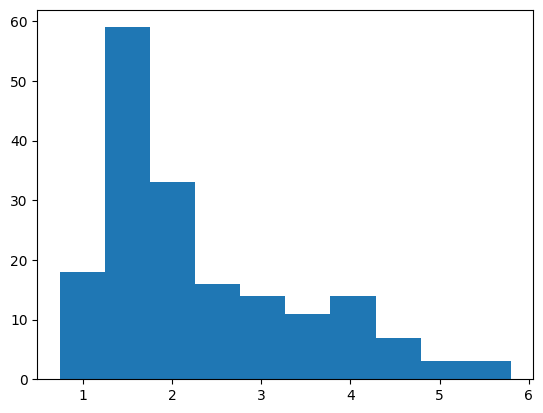

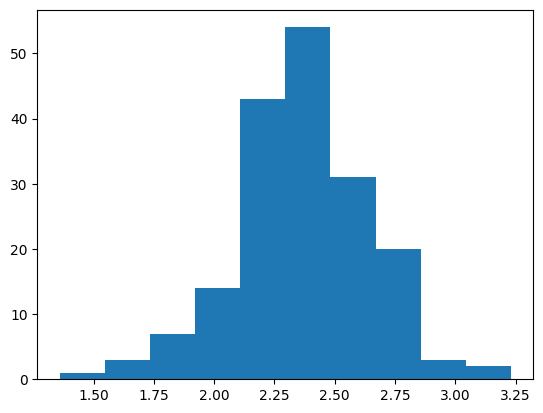

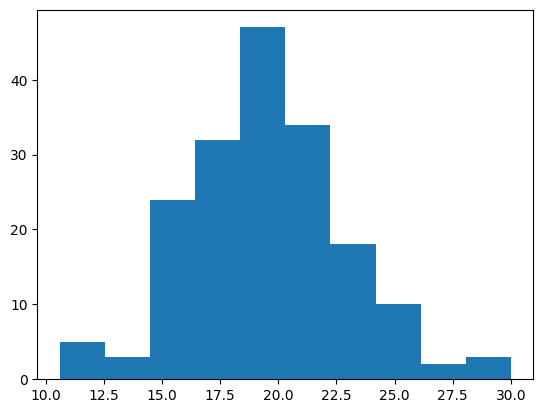

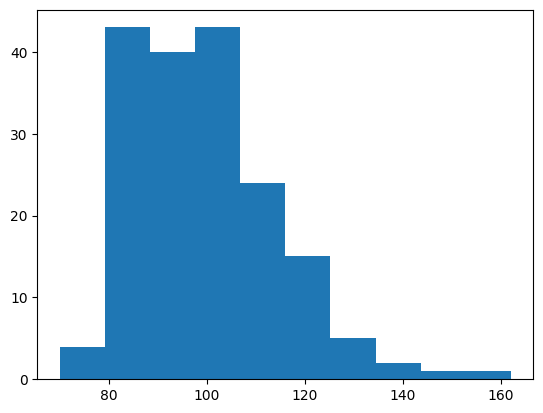

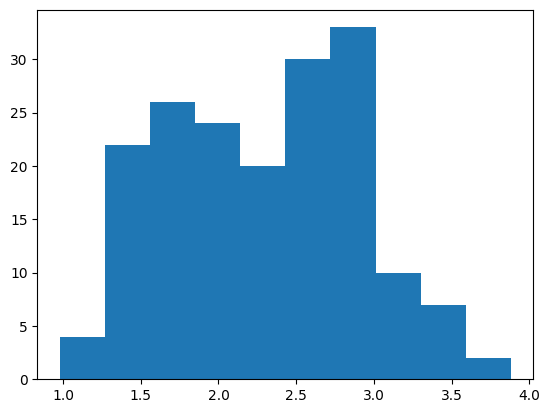

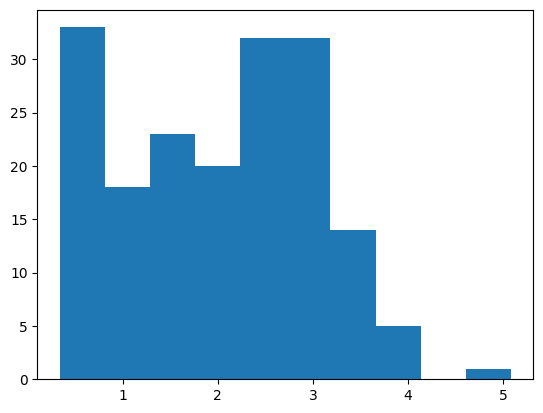

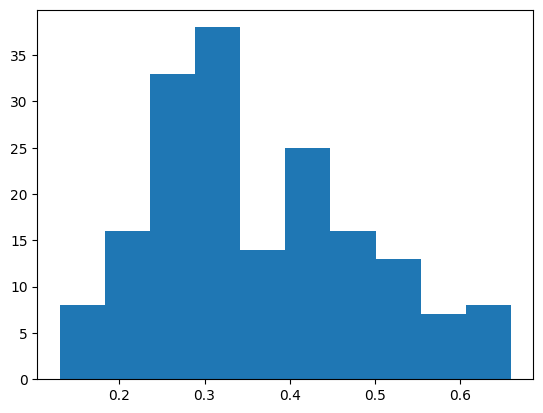

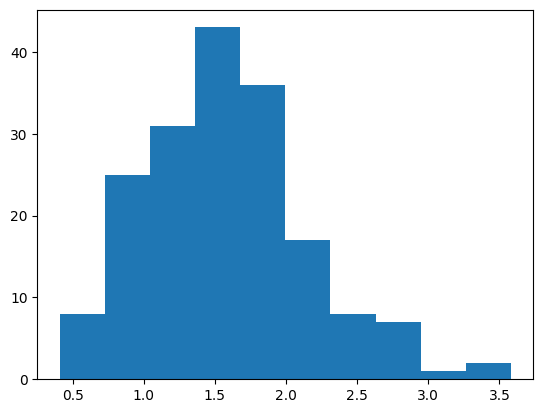

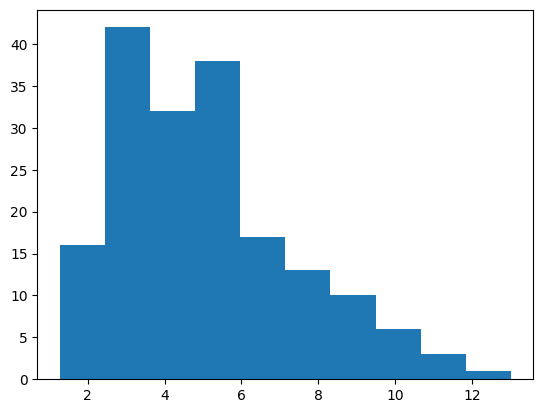

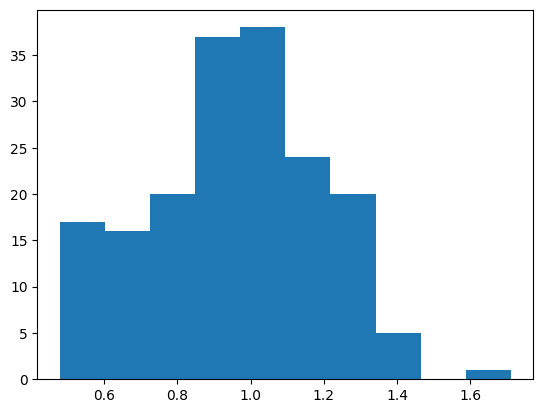

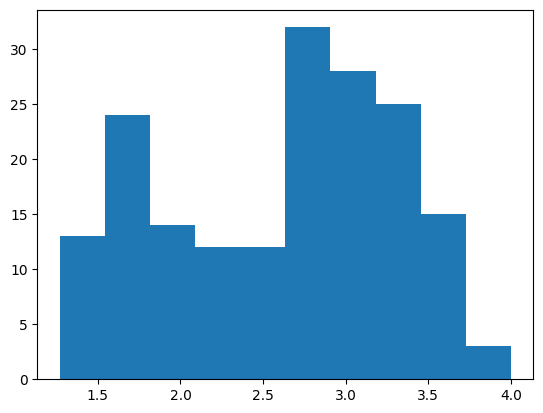

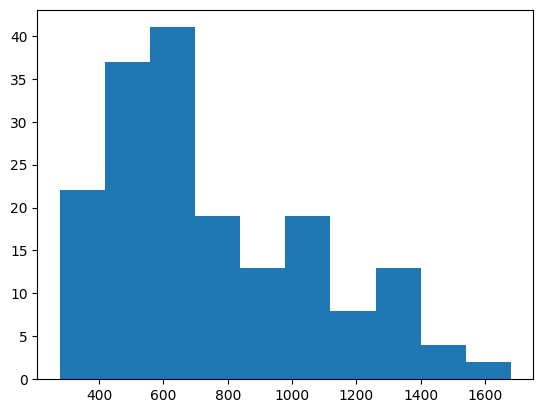

In [13]:
# ploting the histographs for the every feature in the data set:

import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure()
    plt.hist(df[col])
    plt.show()

In [14]:
''' 
   so with the help of the histographs for every features in the data set that some of the features are having the skewedness in the graphs that means out layers are present in it. so first we have to remove the out layers in the data set.
   '''

' \n   so with the help of the histographs for every features in the data set that some of the features are having the out layers in it. so first we have to remove the out layers in the data set.\n   '

<Axes: >

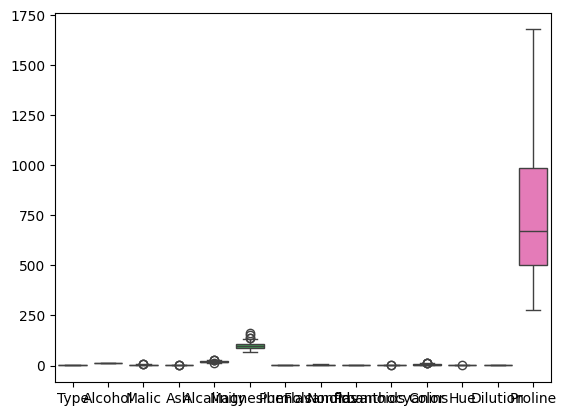

In [15]:
# ploting the boxplot for the features:

sns.boxplot(df)

# we can see that some features have out layers in it:

In [16]:
# removing the outliers in the data set:

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
df = df[
        ~((df.lt(q1 - 1.5 * iqr)) | (df.gt(q3 + 1.5 * iqr))).any(axis=1)
]

<Axes: >

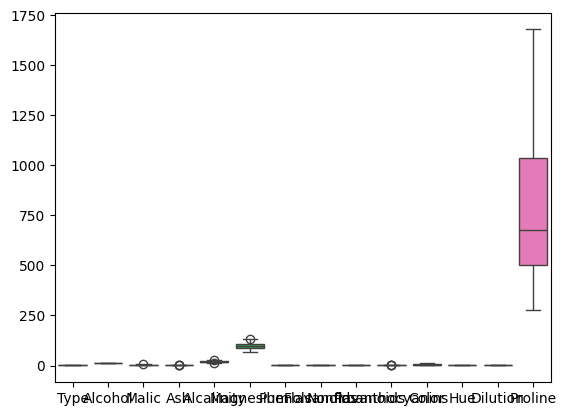

In [17]:
# after removing the outlayers in the dataset:

sns.boxplot(df)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.381205,0.452109,-0.078546,0.575001,-0.262600,-0.753168,-0.881054,0.503776,-0.604235,0.202214,-0.633903,-0.791690,-0.647803
Alcohol,-0.381205,1.000000,0.087627,0.221731,-0.360546,0.418736,0.341107,0.319613,-0.181695,0.237687,0.549755,0.002908,0.118723,0.661370
Malic,0.452109,0.087627,1.000000,0.176896,0.304459,0.021328,-0.365845,-0.455470,0.297771,-0.243416,0.285962,-0.582334,-0.392932,-0.184435
Ash,-0.078546,0.221731,0.176896,1.000000,0.308742,0.417566,0.112113,0.051413,0.087043,0.032512,0.199414,-0.039670,-0.023797,0.269735
Alcalinity,0.575001,-0.360546,0.304459,0.308742,1.000000,-0.187005,-0.461560,-0.514226,0.339792,-0.336330,-0.070142,-0.326072,-0.369263,-0.492669
Magnesium,-0.262600,0.418736,0.021328,0.417566,-0.187005,1.000000,0.247460,0.208853,-0.241207,0.103294,0.339368,-0.016604,0.031958,0.447921
Phenols,-0.753168,0.341107,-0.365845,0.112113,-0.461560,0.247460,1.000000,0.883885,-0.497143,0.650064,-0.039527,0.475820,0.703516,0.526456
Flavanoids,-0.881054,0.319613,-0.455470,0.051413,-0.514226,0.208853,0.883885,1.000000,-0.596938,0.744178,-0.142604,0.593110,0.780947,0.535828
Nonflavanoids,0.503776,-0.181695,0.297771,0.087043,0.339792,-0.241207,-0.497143,-0.596938,1.000000,-0.429833,0.098404,-0.280774,-0.525535,-0.312622
Proanthocyanins,-0.604235,0.237687,-0.243416,0.032512,-0.336330,0.103294,0.650064,0.744178,-0.429833,1.000000,-0.019101,0.354946,0.583396,0.392987


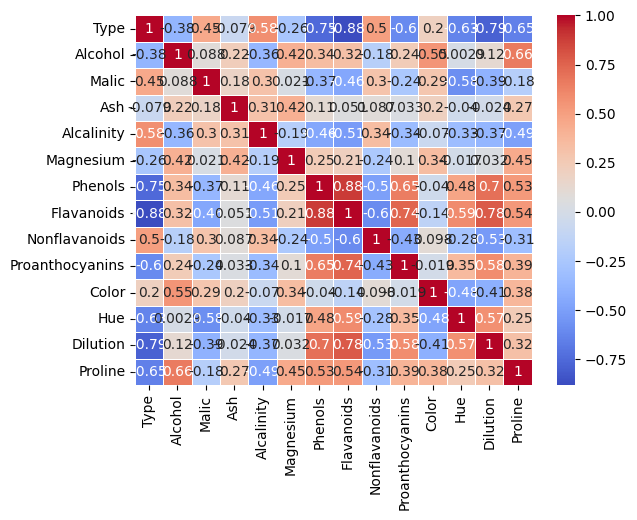

In [23]:
# finding the correlation between the every features in the data set :

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# or

df.corr()


In [36]:
# data transformation :

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
std = ss.fit_transform(df)
df_new = pd.DataFrame(std,columns = original_df.columns)
df_new

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [55]:
# implementing the pca :

from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_df = pca.fit_transform(df_new)
#pca_df = pd.DataFrame(pca_df)
#pca_df
pca_df = pd.DataFrame(pca_df, columns=[f'PC{i+1}' for i in range(8)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8  
0 -0.055637  
1 -1.010372  
2  0.268957  
3 -0.618844  
4 -0.434937  


In [49]:
# finding the dimentionality reduce in the both the datasets:

print(f"Original dimensions: {df_new.shape[1]}")
print(f"Reduced dimensions: {pca_df.shape[1]}")

Original dimensions: 14
Reduced dimensions: 8


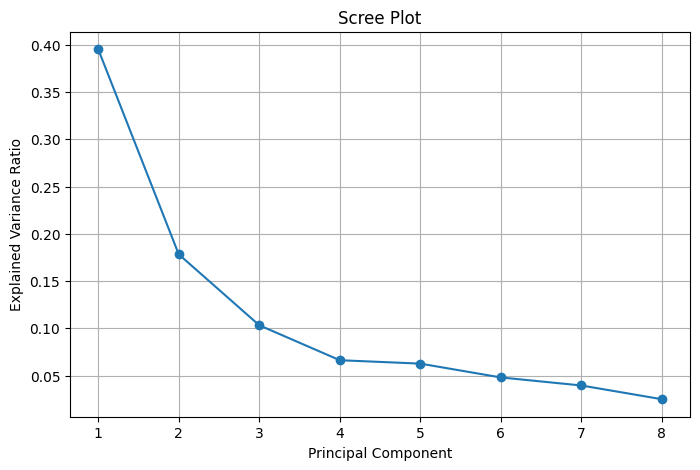

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

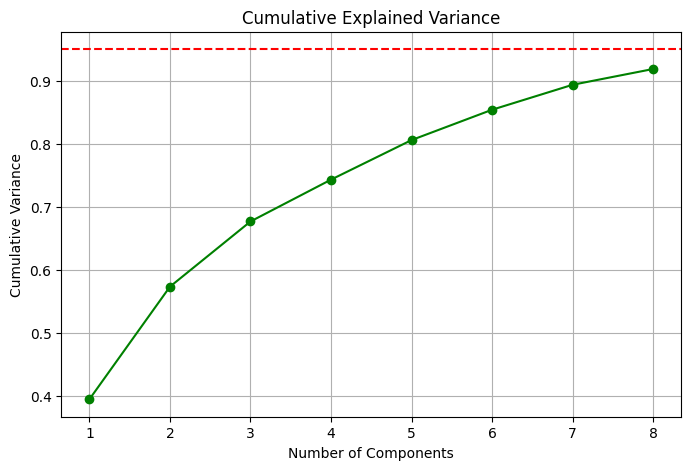

In [51]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # mark 95% threshold
plt.show()


In [61]:
# clustering the  original dataset with the help of kmeans:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for i in range(2,11):
    model = KMeans(n_clusters= i,random_state=42)
    labels = model.fit_predict(df_new)
    score = silhouette_score(df_new,labels)
    scores.append(score)
scores  
    


[np.float64(0.2861665011841207),
 np.float64(0.30648398324833453),
 np.float64(0.27834249005785283),
 np.float64(0.1919138512311236),
 np.float64(0.17231875291741716),
 np.float64(0.18822340152269326),
 np.float64(0.16599826066434276),
 np.float64(0.16438541621887984),
 np.float64(0.12062575875733636)]

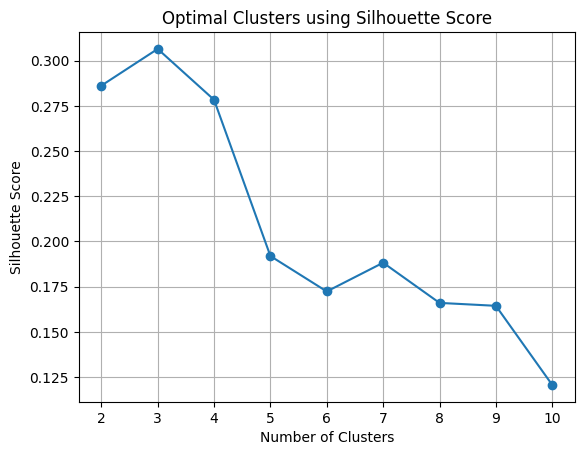

In [62]:
# ploting the Silhouette score  on the graph:

plt.plot(range(2,11), scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Clusters using Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
'''
   from the above graph for the original data set we are seeing the best score with the 3 clusters :
   '''

In [63]:
# calculating the silhouette_score for the pca data set:

scores = []
for i in range(2,11):
    model = KMeans(n_clusters= i,random_state=42)
    labels = model.fit_predict(pca_df)
    score = silhouette_score(pca_df,labels)
    scores.append(score)
scores 

[np.float64(0.31248419831441265),
 np.float64(0.34024286668577874),
 np.float64(0.2920254899725326),
 np.float64(0.23768013332731985),
 np.float64(0.18511652540864834),
 np.float64(0.1774284993081953),
 np.float64(0.17951735788514495),
 np.float64(0.15409371130328023),
 np.float64(0.13092215790605305)]

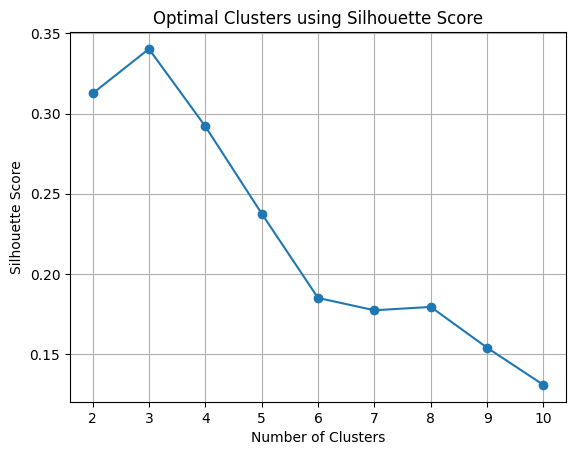

In [64]:
# ploting the Silhouette score  on the graph:

plt.plot(range(2,11), scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal Clusters using Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
'''
   from the above graph for the pca data set we got best score with the 3 clusters:
   '''

--> on the original data set  with 14 columns we got Silhouette score = 0.3064 
    and for the pca data set with only 8 columns we got Silhouette score = 0.340 

--> So pca with less columns gave the best clustering results that the original dataset.

-->PCA can improve clustering by reducing noise.
-->KMeans performs differently based on input dimensions.

-->Use PCA when:

    -->Dataset has many correlated features
    -->You want to visualize high-dimensional data
    -->Avoid PCA if interpretability of original features is critical.

